In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <span style="color:blue">Import Libraries</span>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6);

# Read Data

In [ ]:
data_female = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final /ANSUR II FEMALE Public.csv')
dff = data_female.copy()
dff.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [ ]:
data_male = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final /ANSUR II MALE Public.csv', encoding='iso-8859-1')
data_male
dfm = data_male.copy()
dfm.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [ ]:
set(dff.columns) == set(dfm.columns)

False

In [ ]:
set(dff.columns) ^ (set(dfm.columns))

{'SubjectId', 'subjectid'}

In [ ]:
dfm.rename(columns={'subjectid': 'SubjectId'}, inplace=True)

In [ ]:
set(dff.columns) == set(dfm.columns)

True

In [ ]:
df = pd.concat([dff, dfm], axis = 0)

In [ ]:
df.shape

(6068, 108)

In [ ]:
df.Gender.value_counts()

Gender
Male      4082
Female    1986
Name: count, dtype: int64

# EDA

In [ ]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (6068, 106)
___________________________
Data Types:
Types
int64     97
object     9
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Age,int64,6068,42,0,17,58
Branch,object,6068,3,0,Combat Arms,Combat Support
Component,object,6068,3,0,Army National Guard,Regular Army
Date,object,6068,253,0,1-Aug-11,9-Nov-11
Gender,object,6068,2,0,Female,Male
...,...,...,...,...,...,...
waistfrontlengthsitting,int64,6068,188,0,289,494
waistheightomphalion,int64,6068,350,0,805,1245
weightkg,int64,6068,783,0,358,1442
wristcircumference,int64,6068,79,0,124,216


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SubjectId,6068.000,20757.198,13159.391,10027.000,14841.750,20063.500,27234.500,920103.000
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
anklecircumference,6068.000,224.891,16.052,156.000,214.000,225.000,235.000,293.000
...,...,...,...,...,...,...,...,...
SubjectNumericRace,6068.000,17.515,550.950,1.000,1.000,1.000,2.000,42351.000
DODRace,6068.000,1.615,0.979,1.000,1.000,1.000,2.000,8.000
Age,6068.000,29.761,8.675,17.000,23.000,28.000,36.000,58.000
Heightin,6068.000,68.257,3.862,56.000,66.000,68.000,71.000,94.000


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


gender ,date , ethnicity

## Missing Value Control

In [ ]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

In [ ]:
missing_values(df)

,Missing_Number,Missing_Percent
Ethnicity,4647,0.766


## Duplicate Control

In [ ]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [ ]:
duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


# Ethnicity, SubjectNumericRace and DODRace Columns

In [ ]:
df.Ethnicity.value_counts()

Ethnicity
Mexican                              357
Puerto Rican                         183
Caribbean Islander                   124
Filipino                              67
Cherokee                              65
                                    ... 
Creek Samoan                           1
Omaha                                  1
Algonquin Navajo Penobscot             1
Undisclosed Native American Tribe      1
Blackfoot Cherokee Choctaw             1
Name: count, Length: 209, dtype: int64

In [ ]:
df.SubjectNumericRace.value_counts()

SubjectNumericRace
1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
62          8
35          8
64          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
641         2
431         2
423         2
2518        2
451         2
2351        2
318         2
425         1
238         1
358         1
48          1
42351       1
428         1
631         1
4251        1
Name: count, dtype: int64

In [ ]:
subject_numeric_race_values = set(df['SubjectNumericRace'].unique())
dod_race_values = set(df['DODRace'].unique())

# Checking for the existence of different values
if subject_numeric_race_values == dod_race_values:
    print("SubjectNumericRace ve DODRace sütunlarındaki değerler aynıdır.")
else:
    print("SubjectNumericRace ve DODRace sütunlarındaki değerler farklıdır.")

SubjectNumericRace ve DODRace sütunlarındaki değerler farklıdır.


In [ ]:
df[['SubjectNumericRace', 'DODRace']]

,SubjectNumericRace,DODRace
0,2,2
1,3,3
2,1,1
3,8,2
4,1,1
...,...,...
4077,51,1
4078,1,1
4079,1,1
4080,1,1


In [ ]:
df.SubjectNumericRace.value_counts()

SubjectNumericRace
1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
62          8
35          8
64          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
641         2
431         2
423         2
2518        2
451         2
2351        2
318         2
425         1
238         1
358         1
48          1
42351       1
428         1
631         1
4251        1
Name: count, dtype: int64

In [ ]:
different_rows = df[df['SubjectNumericRace'] != df['DODRace']]

# Rows with distinct values
different_rows[['SubjectNumericRace', 'DODRace']]

,SubjectNumericRace,DODRace
3,8,2
11,218,2
17,21,2
18,21,2
21,21,2
...,...,...
4038,21,1
4039,51,1
4054,5,6
4055,51,5


In [ ]:
different_rows2 = df[df['SubjectNumericRace'] != df['Ethnicity']]

# Let's print the rows with distinct values.
different_rows2[['SubjectNumericRace', 'Ethnicity']].sample(50)

,SubjectNumericRace,Ethnicity
3189,2,NaN
3646,2,NaN
1903,2,NaN
1388,1,NaN
2811,1,NaN
2842,1,NaN
220,1,NaN
2600,1,NaN
2759,1,NaN
1272,1,NaN


In [ ]:
df.Ethnicity.value_counts()

Ethnicity
Mexican                              357
Puerto Rican                         183
Caribbean Islander                   124
Filipino                              67
Cherokee                              65
                                    ... 
Creek Samoan                           1
Omaha                                  1
Algonquin Navajo Penobscot             1
Undisclosed Native American Tribe      1
Blackfoot Cherokee Choctaw             1
Name: count, Length: 209, dtype: int64

In [ ]:
df[['Ethnicity', 'DODRace', 'SubjectNumericRace']]

,Ethnicity,DODRace,SubjectNumericRace
0,NaN,2,2
1,Mexican,3,3
2,NaN,1,1
3,Caribbean Islander,2,8
4,NaN,1,1
...,...,...,...
4077,Blackfoot Cherokee Choctaw,1,51
4078,NaN,1,1
4079,NaN,1,1
4080,NaN,1,1


In [ ]:
df.loc[df['DODRace'] == 1, 'Ethnicity'].unique()

array([nan, 'Cherokee', 'Mexican', 'Algonquin Navajo Penobscot',
       'Arab or Middle Eastern', 'Apache Cherokee', 'Comanche', 'Korean',
       'Puerto Rican Seneca', 'Potawatomi', 'Cherokee Choctaw Mexican',
       'Thai', 'Puerto Rican', 'Cherokee Hawaiian', 'Filipino',
       'Choctaw Cherokee', 'Chippewa', 'Guamanian/Chamorro', 'Muscogee',
       'Blackfoot', 'Cherokee Sioux', 'Hawaiian Polynesian', 'Creek',
       'Chippewa Narragansett', 'East/Asian Indian', 'Japanese',
       'Lenape Puerto Rican', 'Cherokee Choctaw',
       'Undisclosed Native American Tribe', 'Chinese Vietnamese', 'Cree',
       'Choctaw', 'Mexican Yaqui', 'Colombian', 'Peruvian', 'Guatemalan',
       'Apache', 'Turkish', 'Azorean', 'Houma', 'Cuban', 'Salvadoran',
       'Lumbee', 'Caribbean Islander East/Asian Indian', 'Shawnee',
       'Cherokee Iroquois', 'Sioux', 'Cherokee Comanche',
       'Hunkpapa Lakota', 'Caribbean Islander Puerto Rican',
       'Caribbean Islander', 'Kiowa', 'Chinese', 'Ojibwe', 'U

In [ ]:
df['Ethnicity'].unique()

array([nan, 'Mexican', 'Caribbean Islander', 'Polynesian Samoan',
       'Dominican', 'Cherokee', 'Puerto Rican', 'Samoan', 'Burmese',
       'Blackfoot Cherokee Shawnee', 'Tsimshian', 'Korean',
       'Cochiti Pueblo Mexican', 'Navajo', 'Filipino',
       'Algonquin Navajo Penobscot', 'Chilean Mexican',
       'Lakota Sioux Oglala Sioux', 'Nicaraguan',
       'Arab or Middle Eastern', 'Argentine', 'Peruvian',
       'Belizean Dominican', 'Cuban Mexican', 'Chinese Filipino',
       'Apache Cherokee', 'Laotian', 'Comanche', 'Honduran', 'Chinese',
       'Vietnamese', 'Ecuadorian', 'Cherokee Puerto Rican',
       'Chinese Thai', 'Salvadoran', 'Puerto Rican Seneca',
       'Filipino Puerto Rican', 'Cuban Puerto Rican',
       'Arab or Middle Eastern Venezuelan', 'Bolivian', 'Potawatomi',
       'Cherokee Choctaw Mexican', 'Thai', 'Blackfoot Cherokee',
       'Honduran Panamanian', 'Chinese Hmong', 'Chippewa', 'Hmong',
       'Seminole', 'Brazilian', 'Cuban',
       'Caribbean Islander Chi

In [ ]:
print("Ethnicity sütunundaki NaN değerlerin sayısı:", df['Ethnicity'].isnull().sum())

Ethnicity sütunundaki NaN değerlerin sayısı: 4647


## Target sutunu olusturma

In [ ]:
ethnicity_to_race = {
    'Chinese': 'Asian',
    'Cherokee': 'Native American',
    'Belizean': 'Hispanic',
    'Mexican': 'Hispanic',
    'Navajo': 'Native American',
    'Cherokee Puerto Rican': 'Hispanic',
    'Filipino': 'Asian',
    'Mexican Yaqui': 'Hispanic',
    'Caribbean Islander': 'Hispanic',
    'Arab or Middle Eastern': 'Arab or Middle Eastern',
    'Kiowa': 'Native American',
    'Puerto Rican': 'Hispanic',
    'Cuban': 'Hispanic',
    'Colombian': 'Hispanic',
    'Chippewa': 'Native American',
    'Salvadoran': 'Hispanic',
    'Azorean': 'Hispanic',
    'Potawatomi': 'Native American',
    'Apache Cherokee': 'Native American',
    'Chinese Vietnamese': 'Asian',
    'Armenian': 'Armenian',
    'Costa Rican Cuban': 'Hispanic',
    'Hmong': 'Asian',
    'Japanese': 'Asian',
    'Peruvian': 'Hispanic',
    'Chickasaw Choctaw': 'Native American',
    'Lakota Sioux': 'Native American',
    'Vietnamese': 'Asian',
    'Shawnee': 'Native American',
    'Cherokee Comanche': 'Native American',
    'Blackfoot Shawnee': 'Native American',
    'Cherokee Choctaw': 'Native American',
    'Korean': 'Asian',
    'Hawaiian': 'Pacific Islander',
    'Caribbean Islander East/Asian Indian': 'Caribbean Islander',
    'Malaysian': 'Asian',
    'Creek': 'Native American',
    'Apache': 'Native American',
    'Choctaw Sioux': 'Native American',
    'Dominican': 'Hispanic',
    'Nicaraguan Salvadoran': 'Hispanic',
    'Chinese Hawaiian Japanese Polynesian': 'Asian',
    'Taiwanese': 'Asian',
    'Lumbee': 'Native American',
    'Mexican Puerto Rican': 'Hispanic',
    'Apache Blackfoot': 'Native American',
    'Arab or Middle Eastern Honduran': 'Arab or Middle Eastern',
    'Guamanian/Chamorro': 'Pacific Islander',
    'Caribbean Islander Puerto Rican': 'Hispanic',
    'Houma': 'Native American',
    'Honduran': 'Hispanic',
    'Turkish': 'Turkish',
    'Arab or Middle Eastern Cuban': 'Arab or Middle Eastern',
    'Miami': 'Native American',
    'Chinese Japanese Korean Thai': 'Asian',
    'Apache Kiowa Mexican': 'Native American',
    'Caribbean Islander Panamanian': 'Hispanic',
    'Ojibwe': 'Native American',
    'Samoan': 'Pacific Islander',
    'Hunkpapa Lakota': 'Native American',
    'Chickasaw': 'Native American',
    'Dominican Puerto Rican': 'Hispanic',
    'Choctaw': 'Native American',
    'Laotian': 'Asian',
    'Mexican Salvadoran': 'Hispanic',
    'Comanche': 'Native American',
    'Blackfoot Cherokee': 'Native American',
    'Western Cherokee': 'Native American',
    'Cherokee Japanese': 'Native American',
    'Japanese Mexican': 'Asian',
    'Aboriginal Guyanese': 'Aboriginal Guyanese',
    'Caribbean Islander Dominican': 'Hispanic',
    'Chinook': 'Native American',
    'Honduran Nicaraguan': 'Hispanic',
    'Blackfoot': 'Native American',
    'Sioux': 'Native American',
    'Ute': 'Native American',
    'Cherokee Osage': 'Native American',
    'Chinese Filipino': 'Asian',
    'Blackfoot Cherokee Choctaw': 'Native American',
    'Guatemalan': 'Hispanic',
    'Mexican Turkish': 'Hispanic',
    'Nicaraguan': 'Hispanic',
    'Oneida': 'Native American',
    'Caribbean Islander Mexican': 'Hispanic',
    'Cherokee Iroquois': 'Native American',
    'Mescalero Apache': 'Native American',
    'Blackfoot Choctaw Sioux': 'Native American',
    'Japanese Korean': 'Asian',
    'East/Asian Indian': 'Asian',
    'Filipino Mexican': 'Asian',
    'Micronesian': 'Pacific Islander',
    'Costa Rican Salvadoran': 'Hispanic',
    'Guatemalan Honduran': 'Hispanic',
    'Ecuadorian': 'Hispanic',
    'Mexican Pima': 'Hispanic',
    'Mexican Panamanian': 'Hispanic',
    'Cree': 'Native American',
    'Filipino Vietnamese': 'Asian',
    'Mexican Nicaraguan': 'Hispanic',
    'Cherokee Mexican': 'Native American',
    'Salvadoran Venezuelan': 'Hispanic',
    'Cambodian': 'Asian',
    'Argentine Mexican': 'Hispanic',
    'Cherokee Korean': 'Native American',
    'Panamanian': 'Hispanic',
    'Dominican Guyanese': 'Hispanic',
    'Chilean Mexican': 'Hispanic',
    'Argentine Brazilian': 'Hispanic'
}

# Transforming the Ethnicity Column
df['Race'] = df['Ethnicity'].map(ethnicity_to_race)

# Let's check the result.
df[['Ethnicity', 'Race']].sample(20)

,Ethnicity,Race
1796,NaN,NaN
3730,NaN,NaN
802,Caribbean Islander,Hispanic
1797,Caribbean Islander,Hispanic
936,Cherokee Mexican,Native American
2405,NaN,NaN
1726,Caribbean Islander,Hispanic
3839,NaN,NaN
3155,NaN,NaN
2901,NaN,NaN


In [ ]:
df.Race.value_counts()

Race
Hispanic                  843
Asian                     245
Native American           160
Pacific Islander           22
Arab or Middle Eastern     19
Caribbean Islander          2
Turkish                     1
Aboriginal Guyanese         1
Armenian                    1
Name: count, dtype: int64

In [ ]:
print("Race sütunundaki NaN değerlerin sayısı:", df['Race'].isnull().sum())

Race sütunundaki NaN değerlerin sayısı: 4774


In [ ]:
# Let's fill the NaN (null) values.
df['Race'].fillna(df['DODRace'].map({1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Asian', 5: 'Native American', 6: 'Pacific Islander', 8: 'Other'}), inplace=True)
print("Race sütunundaki NaN değerlerin sayısı:", df['Race'].isnull().sum())

Race sütunundaki NaN değerlerin sayısı: 0


In [ ]:
df['Race'].value_counts()

Race
White                     3575
Black                     1092
Hispanic                   893
Asian                      266
Native American            182
Pacific Islander            36
Arab or Middle Eastern      19
Caribbean Islander           2
Turkish                      1
Aboriginal Guyanese          1
Armenian                     1
Name: count, dtype: int64

In [ ]:
df.drop(columns=['Ethnicity', 'DODRace', 'SubjectNumericRace'], inplace=True)

------------------

# Installation , Component, Branch

In [ ]:
df.Installation.value_counts()

Installation
Camp Shelby       1160
Fort Bliss         963
Fort Gordon        669
Fort McCoy         452
Camp Atterbury     441
Fort Hood          439
Fort Huachuca      436
Fort Bragg         397
Fort Drum          391
Fort Lee           380
Fort Stewart       339
Fort Rucker          1
Name: count, dtype: int64

In [ ]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference', 'Race'],
      dtype='object')

In [ ]:
categorical_columns = ['Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference', 'Race']
for column in categorical_columns:
    print(f"{column} Sınıflarının Dağılımı:")
    print(df[column].value_counts())
    print("\n")

Date Sınıflarının Dağılımı:
Date
27-Feb-12    45
5-Apr-12     44
21-Feb-12    43
28-Feb-12    43
5-Mar-12     43
             ..
11-Feb-11     3
25-May-11     2
7-Apr-11      2
16-Nov-10     1
7-Sep-11      1
Name: count, Length: 253, dtype: int64


Installation Sınıflarının Dağılımı:
Installation
Camp Shelby       1160
Fort Bliss         963
Fort Gordon        669
Fort McCoy         452
Camp Atterbury     441
Fort Hood          439
Fort Huachuca      436
Fort Bragg         397
Fort Drum          391
Fort Lee           380
Fort Stewart       339
Fort Rucker          1
Name: count, dtype: int64


Component Sınıflarının Dağılımı:
Component
Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: count, dtype: int64


Branch Sınıflarının Dağılımı:
Branch
Combat Service Support    3174
Combat Arms               1582
Combat Support            1312
Name: count, dtype: int64


PrimaryMOS Sınıflarının Dağılımı:
PrimaryMOS
11B     671
88M     320
92A     288
91B

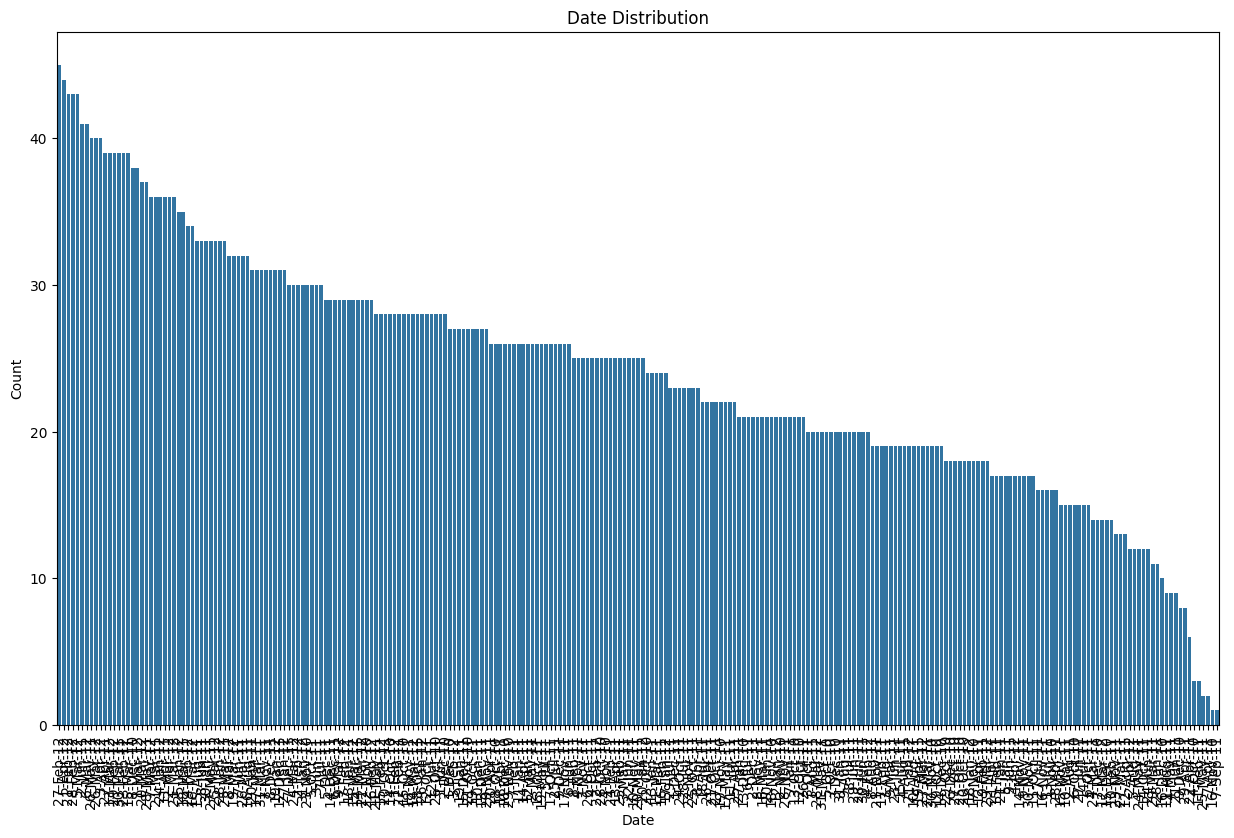

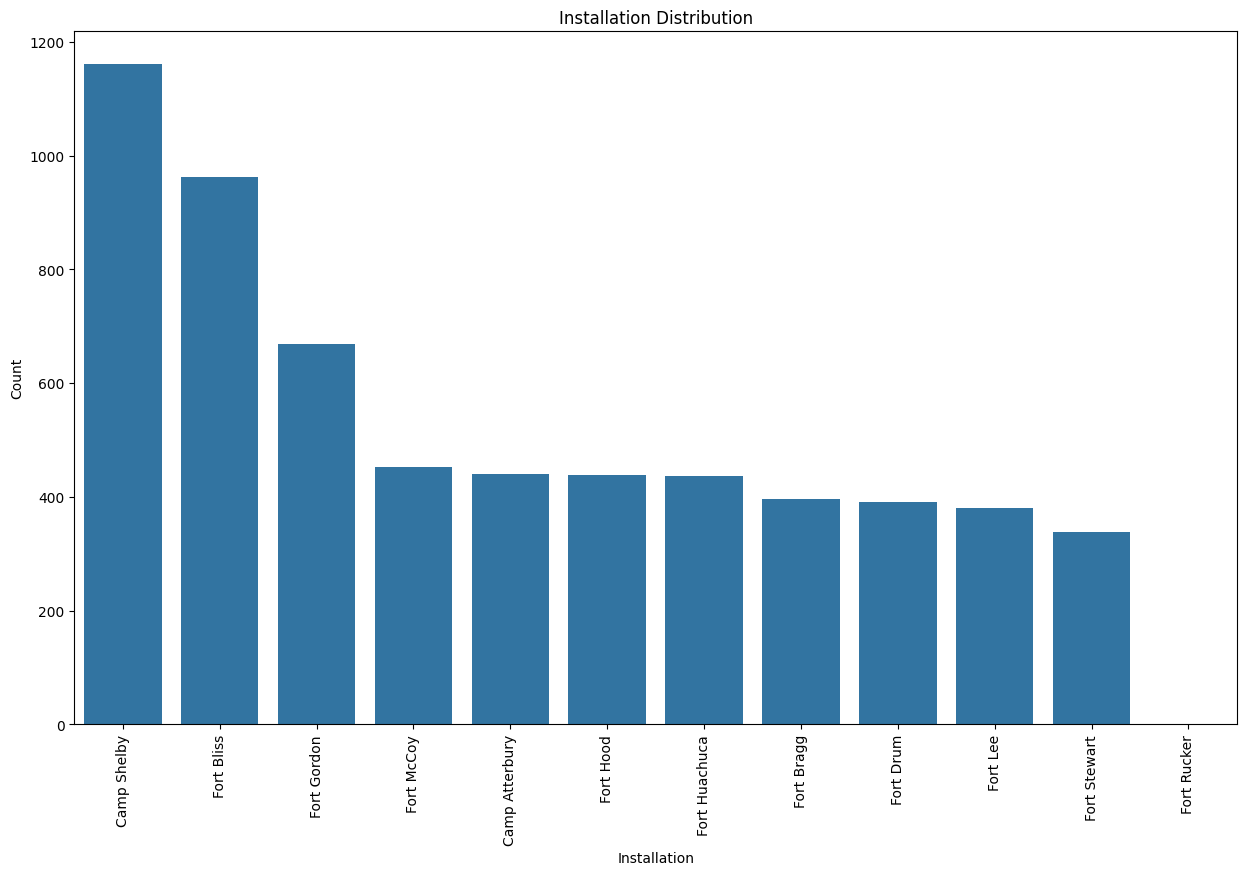

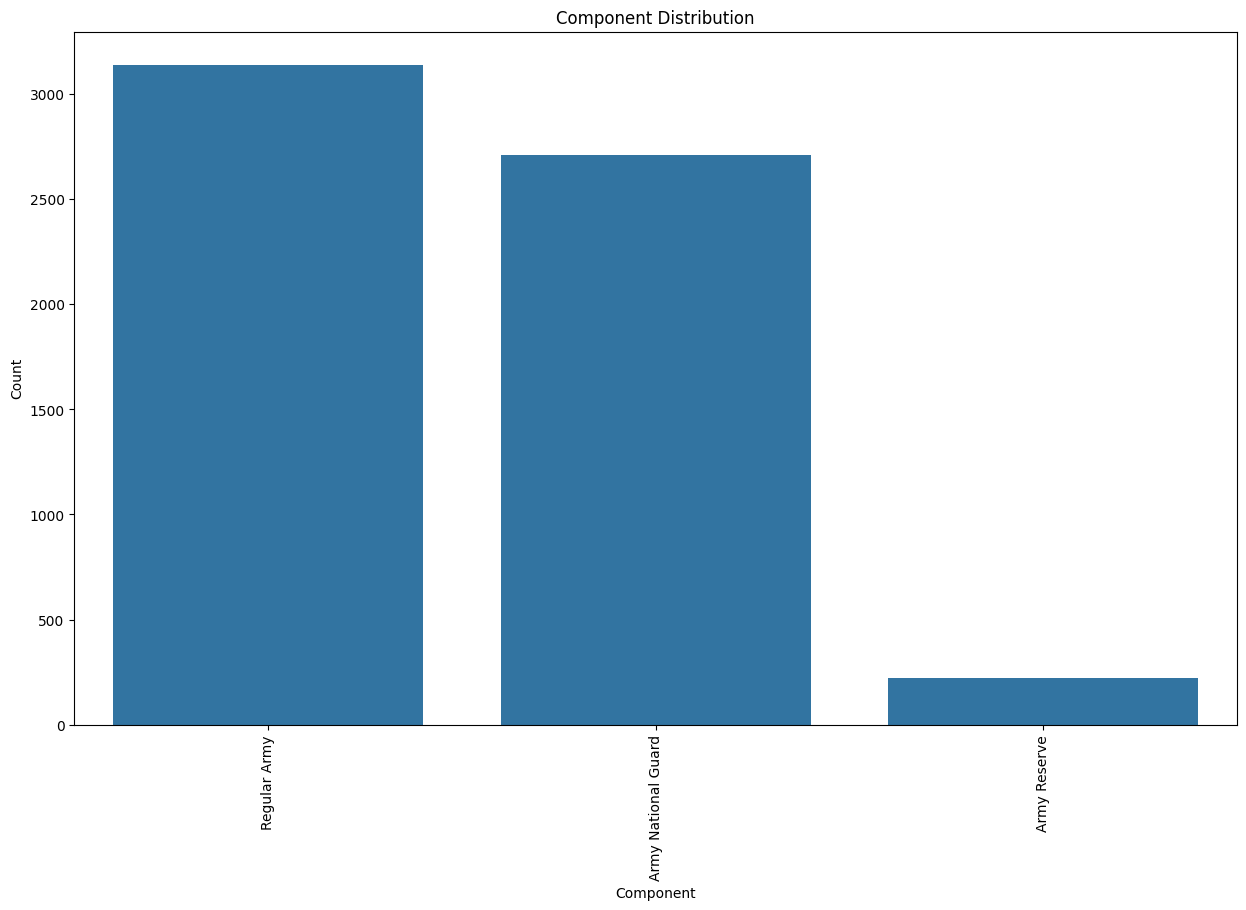

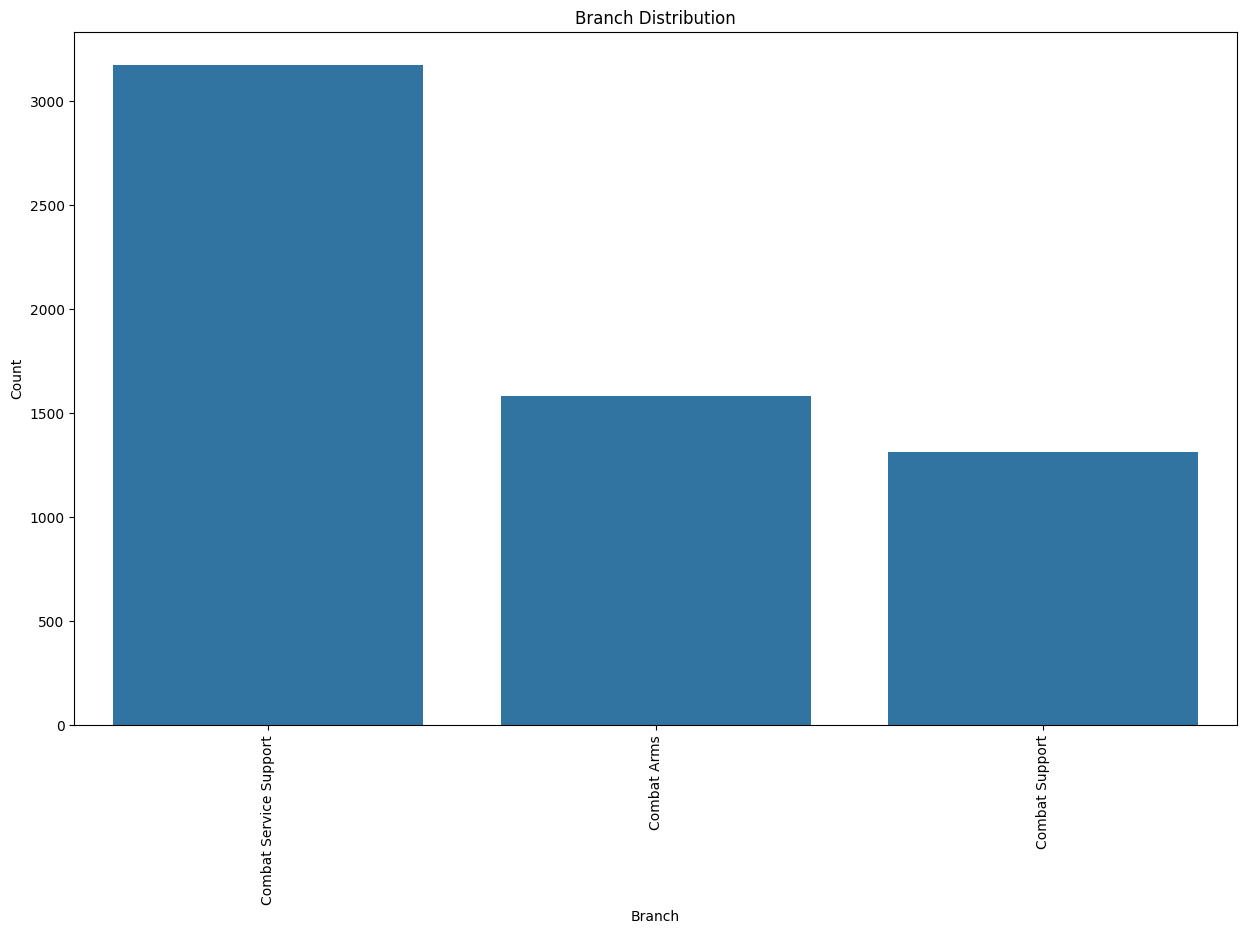

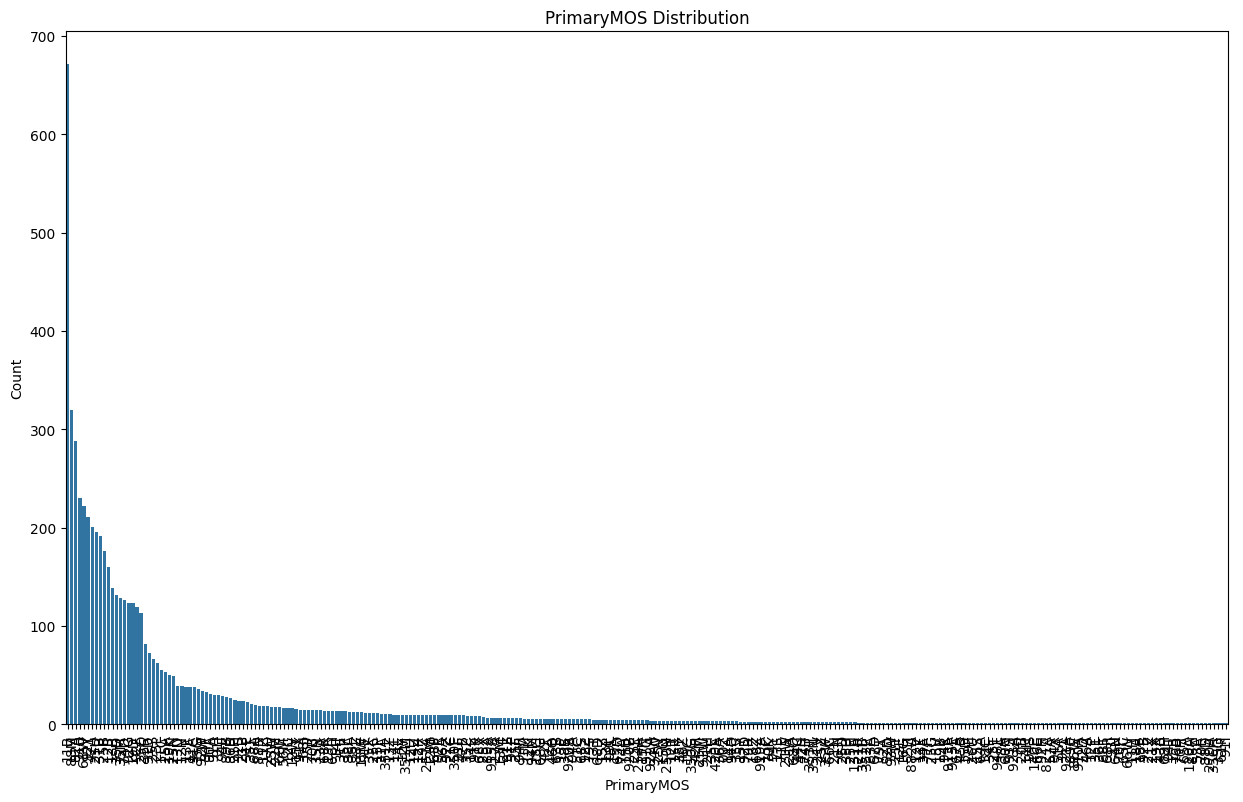

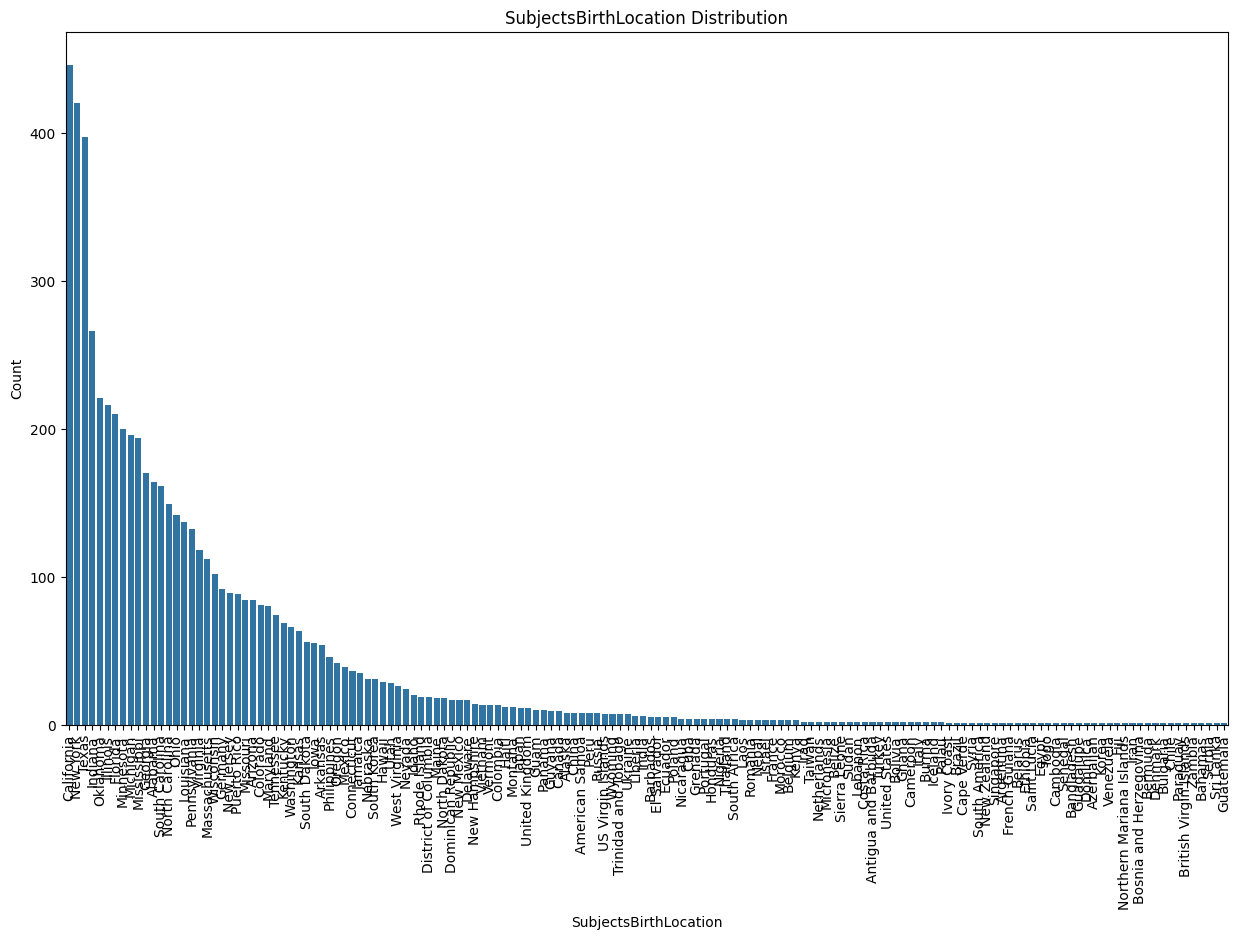

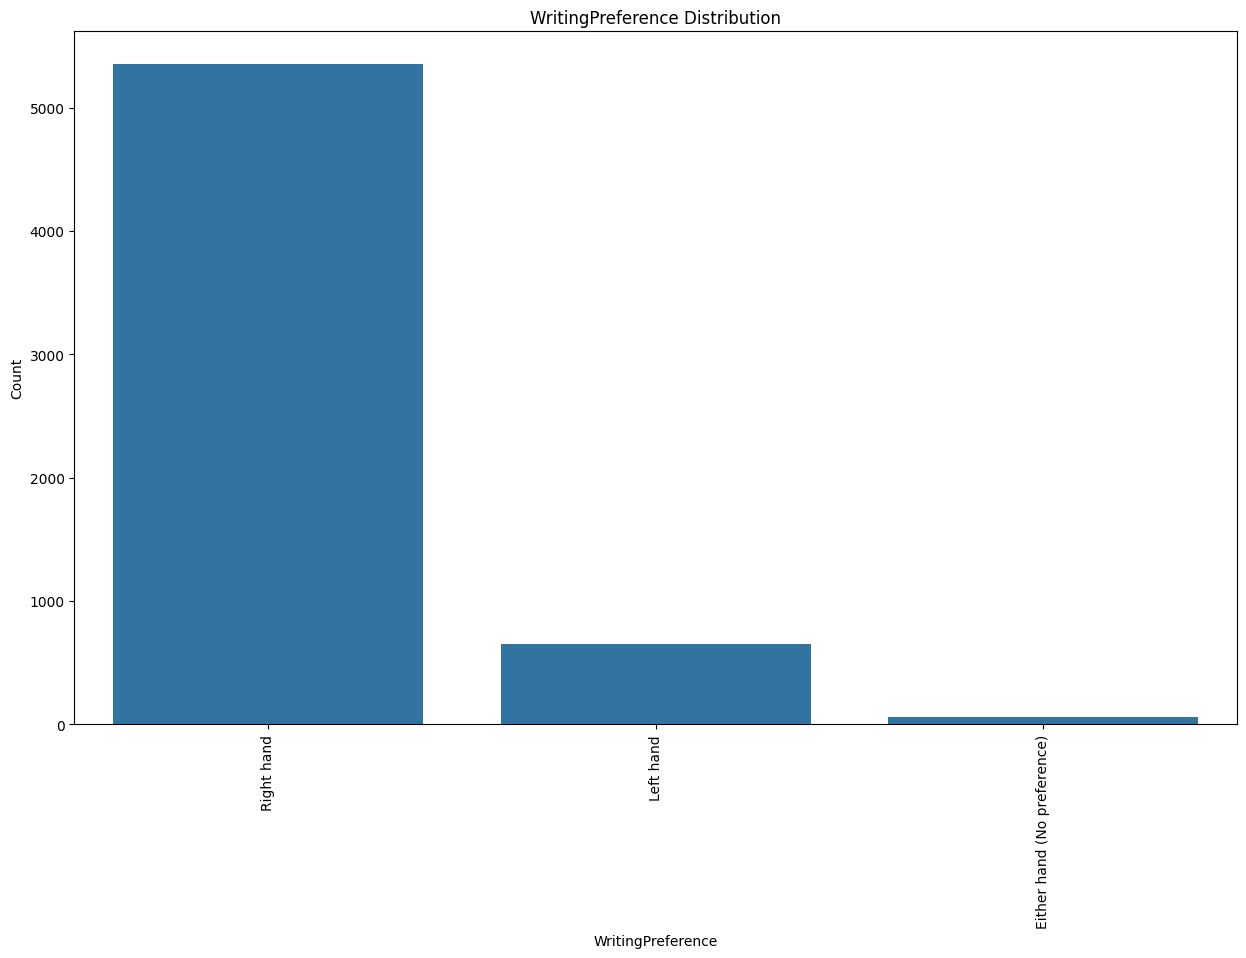

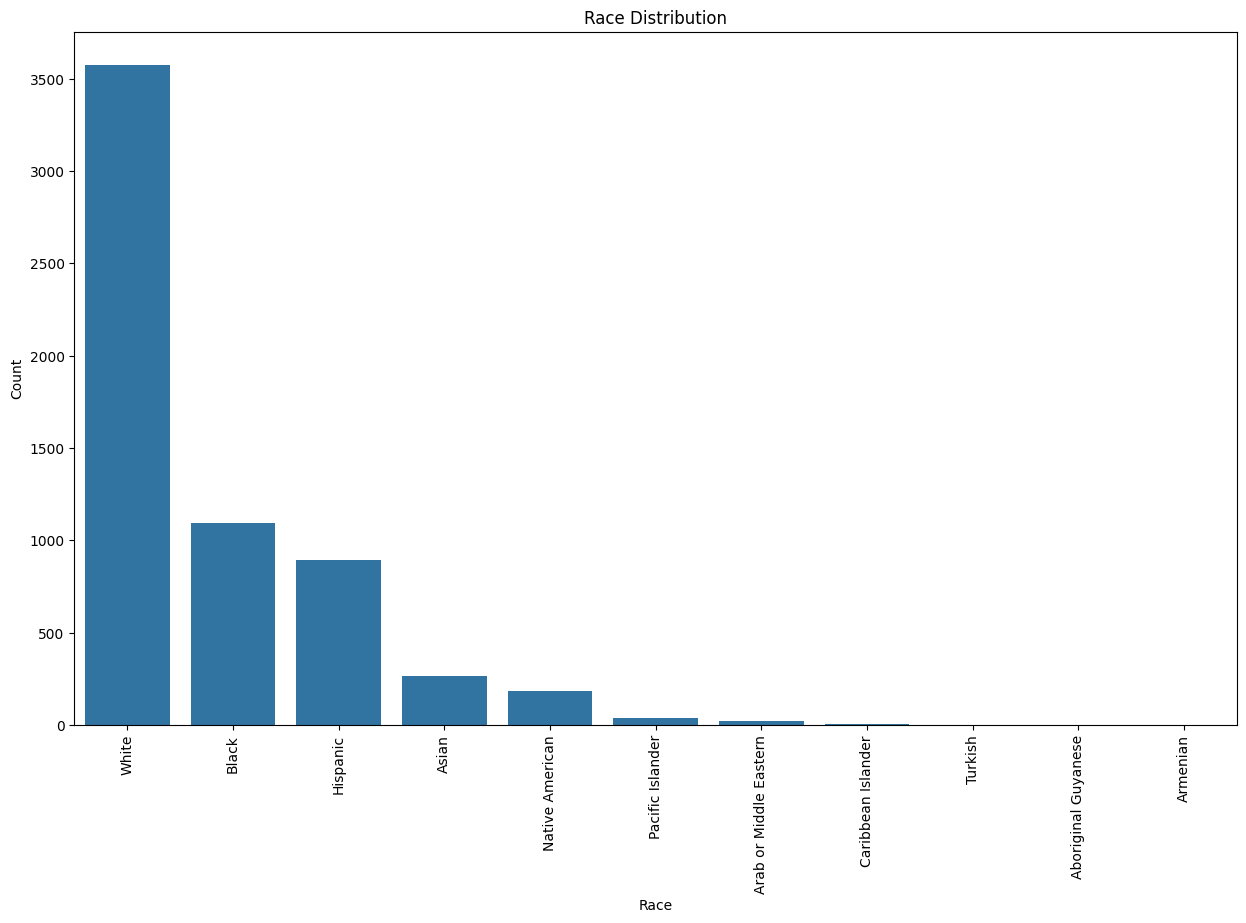

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(15, 9))
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

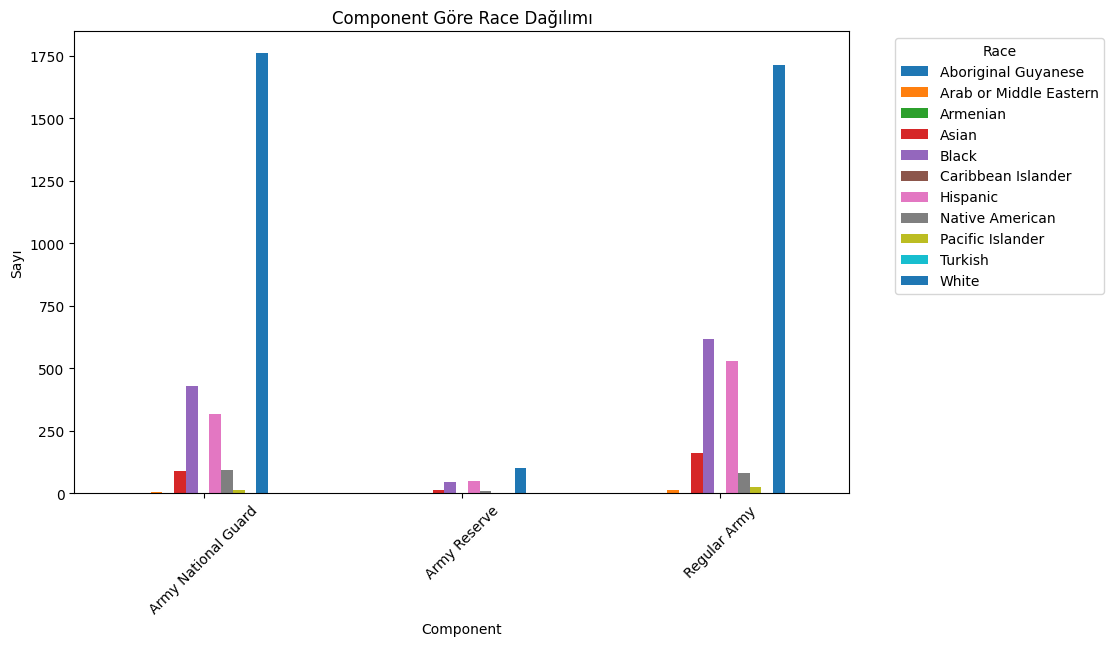

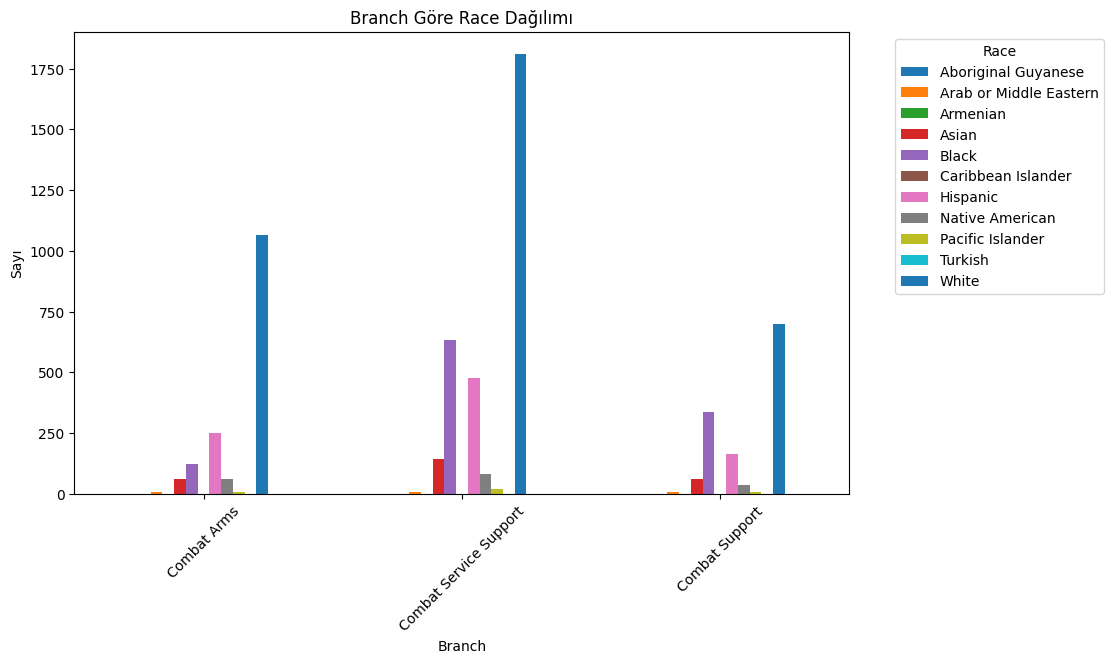

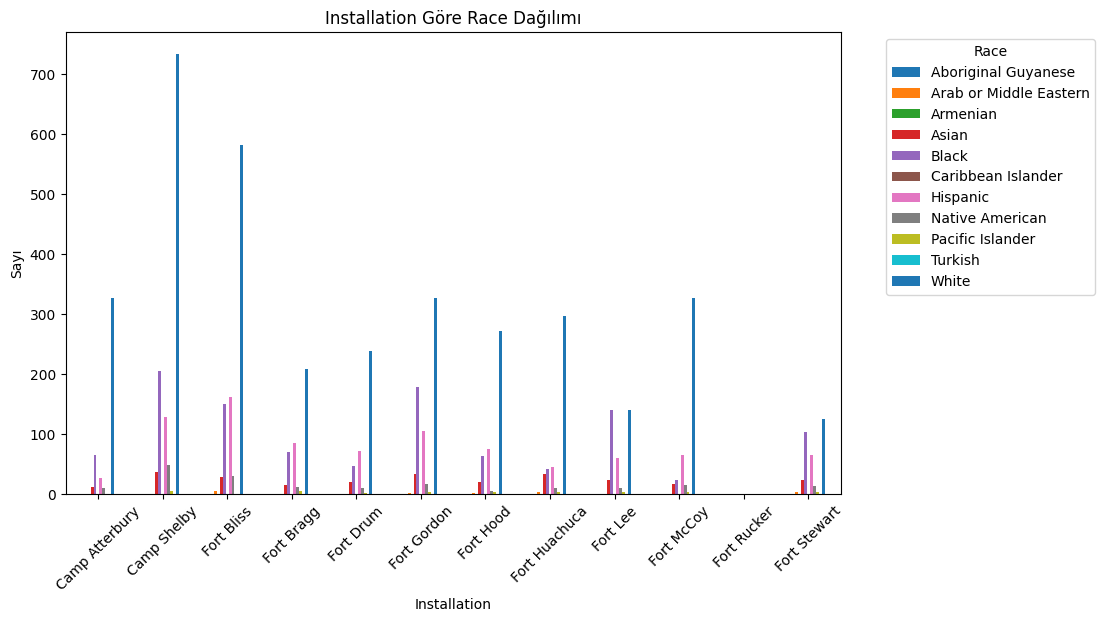

In [ ]:
for column in ['Component', 'Branch', 'Installation']:
    try:
        grouped_counts = df.groupby(column)['Race'].value_counts()
        grouped_counts.unstack().plot(kind='bar', stacked=False)
        plt.title(f'{column} Göre Race Dağılımı')
        plt.xlabel(column)
        plt.ylabel('Sayı')
        plt.xticks(rotation=45)
        plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
    except KeyError:
        print(f"{column} sütunu bulunamadı.")

In [ ]:
display(df[['Component', 'Branch', 'Installation']].groupby(
    ['Component', 'Branch', 'Installation']).agg('sum').style.background_gradient(cmap='Greens'))


In [ ]:
threshold = 20  # Setting the threshold value here.
rare_classes = df['Race'].value_counts()[df['Race'].value_counts() < threshold].index

# Replacing rare classes with 'Others'
df['Race'] = df['Race'].apply(lambda x: 'Others' if x in rare_classes else x)


In [ ]:
df.shape

(6068, 106)

In [ ]:
df.Race.value_counts()

Race
White               3575
Black               1092
Hispanic             893
Asian                266
Native American      182
Pacific Islander      36
Others                24
Name: count, dtype: int64

# Rare class retention using a 1% threshold

In [ ]:
# Continuing by dropping the data points with less than 1% occurrence.
threshold = len(df) * 0.01  # Up to 1% of the total data count.
rare_classes = df['Race'].value_counts()[df['Race'].value_counts() < threshold].index
df_filtered = df[~df['Race'].isin(rare_classes)]
df_filtered

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Age,Heightin,Weightlbs,WritingPreference,Race
0,10037,231,1282,301,204,1180,222,177,373,315,...,Fort Hood,Regular Army,Combat Support,92Y,Germany,26,61,142,Right hand,Black
1,10038,194,1379,320,207,1292,225,178,372,272,...,Fort Hood,Regular Army,Combat Service Support,25U,California,21,64,120,Right hand,Hispanic
2,10042,183,1369,329,233,1271,237,196,397,300,...,Fort Hood,Regular Army,Combat Service Support,35D,Texas,23,68,147,Right hand,White
3,10043,261,1356,306,214,1250,240,188,384,364,...,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,22,66,175,Right hand,Hispanic
4,10051,309,1303,308,214,1210,217,182,378,320,...,Fort Hood,Regular Army,Combat Arms,42A,Texas,45,63,195,Right hand,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,235,1353,312,216,1263,228,193,384,318,...,Camp Shelby,Army National Guard,Combat Arms,11B,Colorado,22,67,160,Right hand,Native American
4078,29443,247,1473,336,234,1346,253,196,428,374,...,Camp Shelby,Army National Guard,Combat Arms,91B,Oklahoma,22,71,194,Right hand,White
4079,29447,264,1394,313,227,1280,245,193,407,367,...,Camp Shelby,Army National Guard,Combat Arms,13B,Oklahoma,23,67,186,Right hand,White
4080,29451,203,1417,327,223,1314,250,196,419,365,...,Camp Shelby,Army National Guard,Combat Arms,13P,Oklahoma,22,69,165,Right hand,White


In [ ]:
data = df_filtered

In [ ]:
data.Race.value_counts()

Race
White              3575
Black              1092
Hispanic            893
Asian               266
Native American     182
Name: count, dtype: int64

In [ ]:
data.select_dtypes(include='object').columns

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference', 'Race'],
      dtype='object')

----------------

In [ ]:
data.select_dtypes(include='int64').columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbre

# weightkg, Weightlbs, stature,Heightin

In [ ]:
# Let's compare the measured values ​​to the person's stated weight.
def lbs_to_kg(weight_lbs):
    return weight_lbs * 0.453592

#  Converting the 'Weightlbs' column to the 'weightkg' column.
data['Weightlbs1'] = data['Weightlbs'].apply(lbs_to_kg)

data['weightkg'] = data['weightkg'] / 10

# Checking if two columns are equal.
if (data['weightkg'] == data['Weightlbs1']).all():
    print("İki sütun birbirine eşittir.")
else:
    print("İki sütun birbirinden farklıdır.")

İki sütun birbirinden farklıdır.


In [ ]:
data[['Weightlbs1','weightkg']]

,Weightlbs1,weightkg
0,64.410,65.700
1,54.431,53.400
2,66.678,66.300
3,79.379,78.200
4,88.450,88.600
...,...,...
4077,72.575,67.500
4078,87.997,89.600
4079,84.368,83.200
4080,74.843,73.100


**Taking the measured value for the 'Weight' column, not the reported value.**

In [ ]:
data.drop(['Weightlbs', 'Weightlbs1'], axis=1, inplace=True)

-------------

In [ ]:
data[['stature','Heightin']]

,stature,Heightin
0,1560,61
1,1665,64
2,1711,68
3,1660,66
4,1572,63
...,...,...
4077,1688,67
4078,1765,71
4079,1690,67
4080,1718,69


In [ ]:
data['Heightin'] *= 0.0254

In [ ]:
data['stature'] /= 1000

In [ ]:
data[['stature','Heightin']]

,stature,Heightin
0,1.560,1.549
1,1.665,1.626
2,1.711,1.727
3,1.660,1.676
4,1.572,1.600
...,...,...
4077,1.688,1.702
4078,1.765,1.803
4079,1.690,1.702
4080,1.718,1.753


**Taking the measured value for the 'Height' column, not the reported value**

In [ ]:
data.drop(['Heightin'], axis=1, inplace=True)

# Calculating the BMI (Body Mass Index)

Why are we calculating the BMI value?

The results show that the relationship between percent body fat and BMI is different among different ethnic groups. This should have public health implications for the definitions of BMI cut-off points for obesity, which would need to be population-specific.

https://www.nature.com/articles/0800741

In [ ]:
# BMI hesaplama fonksiyonu
def calculate_bmi(weight, stature):
    return weight / (stature ** 2)

# Her bir satır için BMI hesapla
data['BMI'] = data.apply(lambda row: calculate_bmi(row['weightkg'], row['stature']), axis=1)
data[['stature', 'weightkg', 'BMI']]

,stature,weightkg,BMI
0,1.560,65.700,26.997
1,1.665,53.400,19.263
2,1.711,66.300,22.647
3,1.660,78.200,28.379
4,1.572,88.600,35.853
...,...,...,...
4077,1.688,67.500,23.690
4078,1.765,89.600,28.762
4079,1.690,83.200,29.131
4080,1.718,73.100,24.767


In [ ]:
data[['stature', 'weightkg', 'BMI']].isnull().sum()

stature     0
weightkg    0
BMI         0
dtype: int64

------------

## Check if the measurements are in the same columns

In [ ]:
data_copy = data.copy()
combined_rows = data_copy.apply(lambda row: ''.join(row.astype(str)), axis=1)

# Tüm satırları tekil değerlere indirin
unique_rows = combined_rows.unique()

# Eğer bir satır değeri birden fazla kez tekrarlanıyorsa, bu satır değerlerine sahip bir sütun vardır
duplicate_rows = combined_rows[combined_rows.duplicated()]

if not duplicate_rows.empty:
    print("Aynı satır değerlerine sahip bir sütun bulundu.")
else:
    print("Aynı satır değerlerine sahip bir sütun bulunamadı.")

Aynı satır değerlerine sahip bir sütun bulunamadı.


-----------

In [ ]:
data.select_dtypes(include='object').columns

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference', 'Race'],
      dtype='object')

In [ ]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_columns

['SubjectId',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'handlength',
 'headbread

# date

**Dropping the 'date' column from the model as we believe it will not contribute to the model.**

In [ ]:
data.drop(['Date'], axis=1, inplace=True)

# Installation, Component, Branch, PrimaryMOS

In [ ]:
import scipy.stats
from scipy.stats import chi2_contingency

In [ ]:
data.groupby(["Component", "Branch"])["Race"].value_counts()

Component            Branch                  Race           
Army National Guard  Combat Arms             White              585
                                             Hispanic            93
                                             Black               61
                                             Native American     37
                                             Asian               27
                     Combat Service Support  White              875
                                             Black              276
                                             Hispanic           176
                                             Asian               49
                                             Native American     38
                     Combat Support          White              299
                                             Black               93
                                             Hispanic            48
                                             Native Ame

In [ ]:
target = 'Race'

# Create a crosstab to see the relationship between categorical columns
crosstab_result = pd.crosstab(data['Installation'], data[target])

print("Crosstab:\n", crosstab_result)

# Perform a chi-square test
chi2, p_val, _, _ = scipy.stats.chi2_contingency(crosstab_result)

print("\nKi-kare istatistiği:", chi2)
print("p-değeri:", p_val)

Crosstab:
 Race            Asian  Black  Hispanic  Native American  White
Installation                                                  
Camp Atterbury     12     66        27               10    326
Camp Shelby        37    206       129               49    733
Fort Bliss         29    151       162               30    581
Fort Bragg         15     71        85               12    208
Fort Drum          21     47        72               10    238
Fort Gordon        34    178       106               17    327
Fort Hood          20     63        75                5    271
Fort Huachuca      33     42        45               10    297
Fort Lee           24    140        61               10    141
Fort McCoy         17     24        65               16    327
Fort Rucker         0      0         0                0      1
Fort Stewart       24    104        66               13    125

Ki-kare istatistiği: 433.3813408202131
p-değeri: 1.9088542700488294e-65


In [ ]:
target = 'Race'

# Create a crosstab to see the relationship between categorical columns
crosstab_result = pd.crosstab([df['Component']], [df[target]])

print("Crosstab:\n", crosstab_result)

# Perform a chi-square test
chi2, p_val, _, _ = chi2_contingency(crosstab_result)

print("\nKi-kare istatistiği:", chi2)
print("p-değeri:", p_val)

Crosstab:
 Race                 Asian  Black  Hispanic  Native American  Others  \
Component                                                              
Army National Guard     91    430       317               93       6   
Army Reserve            13     46        48                8       3   
Regular Army           162    616       528               81      15   

Race                 Pacific Islander  White  
Component                                     
Army National Guard                12   1759  
Army Reserve                        0    102  
Regular Army                       24   1714  

Ki-kare istatistiği: 106.1274550706247
p-değeri: 3.4802065970821846e-17


In [ ]:
# Create a crosstab to see the relationship between categorical columns
crosstab_result = pd.crosstab(data['Branch'], data[target])

print("Crosstab:\n", crosstab_result)

# Perform a chi-square test
chi2, p_val, _, _ = scipy.stats.chi2_contingency(crosstab_result)

print("\nKi-kare istatistiği:", chi2)
print("p-değeri:", p_val)

Crosstab:
 Race                    Asian  Black  Hispanic  Native American  White
Branch                                                                
Combat Arms                62    124       251               62   1065
Combat Service Support    144    631       478               83   1811
Combat Support             60    337       164               37    699

Ki-kare istatistiği: 181.49573293239925
p-değeri: 4.994533110632907e-35


In [ ]:
# Create a crosstab to see the relationship between categorical columns
crosstab_result = pd.crosstab(data['PrimaryMOS'], data[target])

print("Crosstab:\n", crosstab_result)

# Perform a chi-square test
chi2, p_val, _, _ = scipy.stats.chi2_contingency(crosstab_result)

print("\nKi-kare istatistiği:", chi2)
print("p-değeri:", p_val)

Crosstab:
 Race        Asian  Black  Hispanic  Native American  White
PrimaryMOS                                                
00Z             0      1         0                0      2
09L             0      1         0                0      0
11A             3      1         2                0     32
11B            26     46       100               32    459
11C             2      4        11                3     34
...           ...    ...       ...              ...    ...
94S             0      0         0                0      1
94T             0      0         0                0      1
94W             0      0         0                0      3
94X             0      0         0                0      1
94Y             0      0         0                0      2

[284 rows x 5 columns]

Ki-kare istatistiği: 1804.8992518959026
p-değeri: 1.009283881654565e-33


## Result

**Installation Column:**

Chi-square statistic: 433.38
p-value: 1.91e-65
Interpretation: The relationship between the Installation column and Race is statistically significant. The low p-value indicates rejection of the null hypothesis (no relationship between the variables). The Installation column is significantly associated with the Race column.

**Component Column:**

Chi-square statistic: 106.13
p-value: 3.48e-17
Interpretation: The relationship between the Component column and Race is statistically significant. The low p-value indicates rejection of the null hypothesis, showing that the Component column is significantly associated with the Race column.

**Branch Column:**

Chi-square statistic: 181.50
p-value: 4.99e-35
Interpretation: The relationship between the Branch column and Race is statistically significant. The low p-value indicates rejection of the null hypothesis, indicating a significant association between the Branch column and the Race column.

**PrimaryMOS Column:**

Chi-square statistic: 1804.90
p-value: 1.01e-33
Interpretation: The relationship between the PrimaryMOS column and Race is statistically significant. The very low p-value indicates rejection of the null hypothesis, showing a strong association between the PrimaryMOS column and the Race column.

-------------

In [ ]:
numerical_data = data.select_dtypes(include=[np.number])

df_temp = numerical_data.corr()

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)

In [ ]:
my_dict = {"feature":feature, "collinear":collinear}
df_col = pd.DataFrame(my_dict)
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
...,...,...
295,weightkg,chestcircumference
296,weightkg,verticaltrunkcircumferenceusa
297,wristcircumference,handcircumference
298,wristheight,acromialheight


# Modelling

## Train | Test Split

In [ ]:
data = data[(data["Race"] == "White") | (data["Race"] == "Black") | (data["Race"] == "Hispanic")]
data

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Gender,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Age,WritingPreference,Race,BMI
0,10037,231,1282,301,204,1180,222,177,373,315,...,Female,Fort Hood,Regular Army,Combat Support,92Y,Germany,26,Right hand,Black,26.997
1,10038,194,1379,320,207,1292,225,178,372,272,...,Female,Fort Hood,Regular Army,Combat Service Support,25U,California,21,Right hand,Hispanic,19.263
2,10042,183,1369,329,233,1271,237,196,397,300,...,Female,Fort Hood,Regular Army,Combat Service Support,35D,Texas,23,Right hand,White,22.647
3,10043,261,1356,306,214,1250,240,188,384,364,...,Female,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,22,Right hand,Hispanic,28.379
4,10051,309,1303,308,214,1210,217,182,378,320,...,Female,Fort Hood,Regular Army,Combat Arms,42A,Texas,45,Right hand,White,35.853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,29441,240,1458,343,231,1344,243,205,394,342,...,Male,Camp Shelby,Army National Guard,Combat Arms,13R,California,21,Right hand,White,26.525
4078,29443,247,1473,336,234,1346,253,196,428,374,...,Male,Camp Shelby,Army National Guard,Combat Arms,91B,Oklahoma,22,Right hand,White,28.762
4079,29447,264,1394,313,227,1280,245,193,407,367,...,Male,Camp Shelby,Army National Guard,Combat Arms,13B,Oklahoma,23,Right hand,White,29.131
4080,29451,203,1417,327,223,1314,250,196,419,365,...,Male,Camp Shelby,Army National Guard,Combat Arms,13P,Oklahoma,22,Right hand,White,24.767


In [ ]:
#data.drop(['Installation', 'Component', 'Branch', 'PrimaryMOS'], axis=1, inplace=True)

In [ ]:
data.select_dtypes(include='object').columns

Index(['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference', 'Race'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['SubjectId','Race'], axis=1)
y = data['Race']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

# Modelling

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, classification_report, roc_auc_score, roc_curve,confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
cat_onehot = X_train.select_dtypes(include='object').columns

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                       remainder=MinMaxScaler())


## LogisticRegression

### Vanilla Logistic Model

In [ ]:
operations = [("OneHotEncoder", column_trans),
              ("logistic",
               LogisticRegression(max_iter=1000,
                                  class_weight='balanced',
                                  random_state=101))]

log_pipe = Pipeline(steps=operations)

log_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=101))])

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[188  19  11]
 [ 11 133  35]
 [ 12  75 628]]
              precision    recall  f1-score   support

       Black       0.89      0.86      0.88       218
    Hispanic       0.59      0.74      0.66       179
       White       0.93      0.88      0.90       715

    accuracy                           0.85      1112
   macro avg       0.80      0.83      0.81      1112
weighted avg       0.87      0.85      0.86      1112


Train_Set
[[ 825   35   14]
 [  45  582   87]
 [  30  288 2542]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       874
    Hispanic       0.64      0.82      0.72       714
       White       0.96      0.89      0.92      2860

    accuracy                           0.89      4448
   macro avg       0.84      0.88      0.86      4448
weighted avg       0.90      0.89      0.89      4448



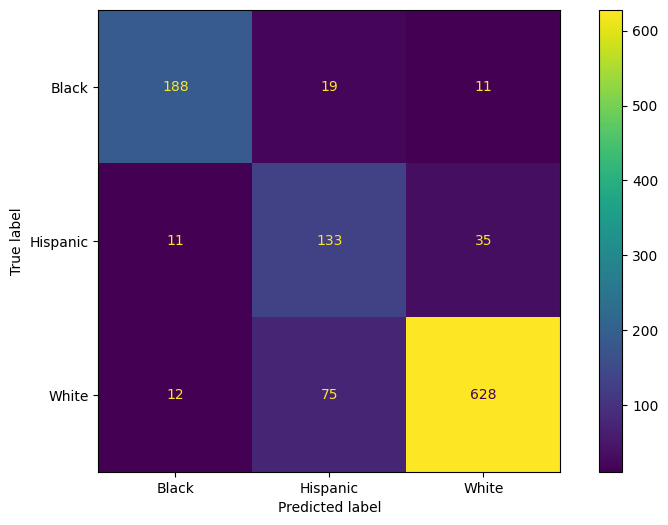

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_pipe, X_test, y_test);

### Logistic Model GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

operations = [("OneHotEncoder", column_trans),
              ("logistic",
               LogisticRegression(max_iter=1000,
                                  class_weight='balanced',
                                  random_state=101))]

log_pipe = Pipeline(steps=operations)

param_grid = [
    {
        "logistic__penalty" : ['l1', 'l2', 'none'],
        "logistic__C" : [0.8, 0.9, 1],
        "logistic__solver": ['liblinear', 'saga', 'lbfgs']
    }
]

cv = StratifiedKFold(n_splits = 10) # unbalanced datalarda kullanılabilir
#macro_f1 = make_scorer(f1_score, average='macro')
micro_f1 = make_scorer(f1_score, average='micro', labels=["Hispanic"])

#scoring = {#'macro_f1': macro_f1,
          #'micro_f1': micro_f1}
log_grid_model = GridSearchCV(estimator=log_pipe,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = micro_f1,
                          n_jobs = -1,
                          return_train_score=True)


In [ ]:
log_grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid=[{'logistic__C': [0.8, 0.9, 1],
                          'logistic__penalty': ['l1', 'l2', 'none'],
                          'logistic__solver': ['liblinear', 'saga', 'lbfgs']}],
             return_train_score=True,
             scoring=make_scorer(f1_score, average=micro, labels=['Hispanic']))

In [ ]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[202   6  10]
 [ 15 113  51]
 [ 12  35 668]]
              precision    recall  f1-score   support

       Black       0.88      0.93      0.90       218
    Hispanic       0.73      0.63      0.68       179
       White       0.92      0.93      0.93       715

    accuracy                           0.88      1112
   macro avg       0.84      0.83      0.84      1112
weighted avg       0.88      0.88      0.88      1112


Train_Set
[[ 817   23   34]
 [  64  492  158]
 [  31  131 2698]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       874
    Hispanic       0.76      0.69      0.72       714
       White       0.93      0.94      0.94      2860

    accuracy                           0.90      4448
   macro avg       0.86      0.86      0.86      4448
weighted avg       0.90      0.90      0.90      4448



In [ ]:
log_grid_model.best_params_

{'logistic__C': 0.9,
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [ ]:
log_grid_model.best_score_

0.6548837931510787

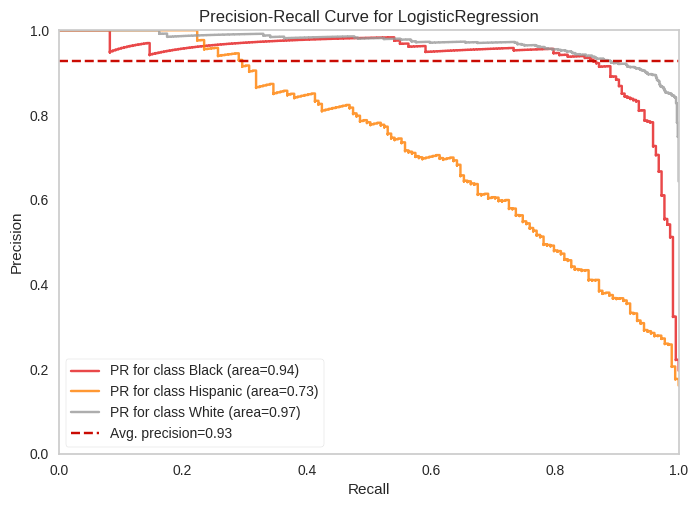

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans),
              ("logistic",
               LogisticRegression(max_iter=1000,
                                  class_weight='balanced',
                                  random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ['Black', 'Hispanic', 'White'],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
y_pred = log_grid_model.predict(X_test)

log_AP = viz.score_['Hispanic']
log_f1 = f1_score(y_test, y_pred, average='micro', labels=['Hispanic'])
log_recall = recall_score(y_test, y_pred, average=None, labels=['Hispanic'])

https://www.emerald.com/insight/content/doi/10.1016/j.aci.2018.08.003/full/html#abstract

In [ ]:
y_train.value_counts()

Race
White       2860
Black        874
Hispanic     714
Name: count, dtype: int64

## SVC Model

### Vanilla SVC Model

In [ ]:
operations_svc = [("OneHotEncoder", column_trans),
                  ("svc", SVC(class_weight="balanced", random_state=101))]

svc_pipe = Pipeline(steps=operations_svc)

svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [ ]:
eval_metric(svc_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[199  14   5]
 [ 16 130  33]
 [ 16  82 617]]
              precision    recall  f1-score   support

       Black       0.86      0.91      0.89       218
    Hispanic       0.58      0.73      0.64       179
       White       0.94      0.86      0.90       715

    accuracy                           0.85      1112
   macro avg       0.79      0.83      0.81      1112
weighted avg       0.87      0.85      0.86      1112


Train_Set
[[ 817   29   28]
 [  69  564   81]
 [  43  330 2487]]
              precision    recall  f1-score   support

       Black       0.88      0.93      0.91       874
    Hispanic       0.61      0.79      0.69       714
       White       0.96      0.87      0.91      2860

    accuracy                           0.87      4448
   macro avg       0.82      0.86      0.84      4448
weighted avg       0.89      0.87      0.87      4448



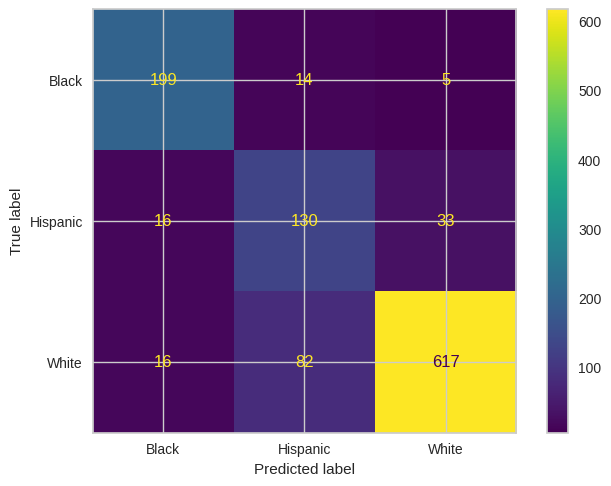

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svc_pipe, X_test, y_test);

### SVC Model GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

svc_operations = [("OneHotEncoder", column_trans),
              ("svc", SVC(class_weight="balanced",random_state=101))]

svc_pipe = Pipeline(steps=svc_operations)

param_grid = {
    'svc__C': [0.5, 1],
    'svc__gamma': ["scale", "auto", 0.01]
}

cv = StratifiedKFold(n_splits = 5) # Available in unbalanced datasets

micro_f1 = make_scorer(f1_score, average='micro', labels=["Hispanic"])

svm_model_grid = GridSearchCV(estimator=svc_pipe,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = micro_f1,
                          n_jobs = -1,
                          return_train_score=True)


In [ ]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=micro, labels=['Hispanic']))

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[199  14   5]
 [ 16 130  33]
 [ 16  82 617]]
              precision    recall  f1-score   support

       Black       0.86      0.91      0.89       218
    Hispanic       0.58      0.73      0.64       179
       White       0.94      0.86      0.90       715

    accuracy                           0.85      1112
   macro avg       0.79      0.83      0.81      1112
weighted avg       0.87      0.85      0.86      1112


Train_Set
[[ 817   29   28]
 [  69  564   81]
 [  43  330 2487]]
              precision    recall  f1-score   support

       Black       0.88      0.93      0.91       874
    Hispanic       0.61      0.79      0.69       714
       White       0.96      0.87      0.91      2860

    accuracy                           0.87      4448
   macro avg       0.82      0.86      0.84      4448
weighted avg       0.89      0.87      0.87      4448



In [ ]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 'scale'}

In [ ]:
svm_model_grid.best_score_

0.5962668874617647

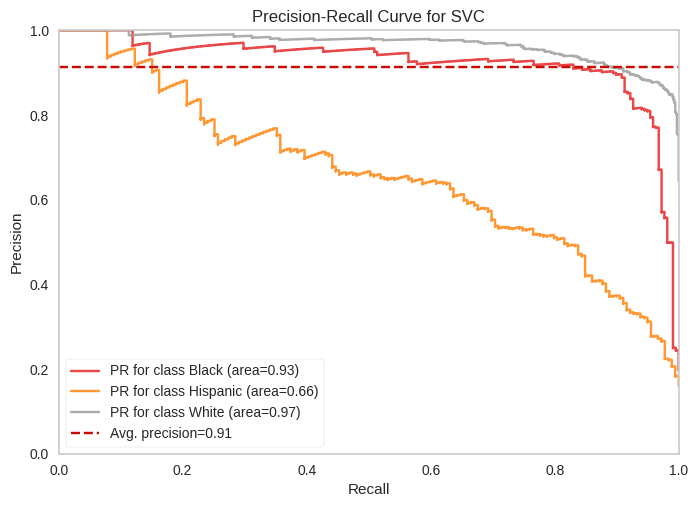

In [ ]:
svc_operations = [("OneHotEncoder", column_trans),
              ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=svc_operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [ 'Black', 'Hispanic', 'White'],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_['Hispanic']
svc_f1 = f1_score(y_test, y_pred, average='micro', labels=['Hispanic'])
svc_recall = recall_score(y_test, y_pred, average=None, labels=['Hispanic'])

## Random Forest Model

### Vanilla RF Model

In [ ]:
operations_rf = [("OneHotEncoder", column_trans),
                  ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

rf_pipe = Pipeline(steps=operations_rf)

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [ ]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[137   1  80]
 [ 24  10 145]
 [  7   6 702]]
              precision    recall  f1-score   support

       Black       0.82      0.63      0.71       218
    Hispanic       0.59      0.06      0.10       179
       White       0.76      0.98      0.86       715

    accuracy                           0.76      1112
   macro avg       0.72      0.56      0.56      1112
weighted avg       0.74      0.76      0.71      1112


Train_Set
[[ 874    0    0]
 [   0  714    0]
 [   0    0 2860]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       874
    Hispanic       1.00      1.00      1.00       714
       White       1.00      1.00      1.00      2860

    accuracy                           1.00      4448
   macro avg       1.00      1.00      1.00      4448
weighted avg       1.00      1.00      1.00      4448



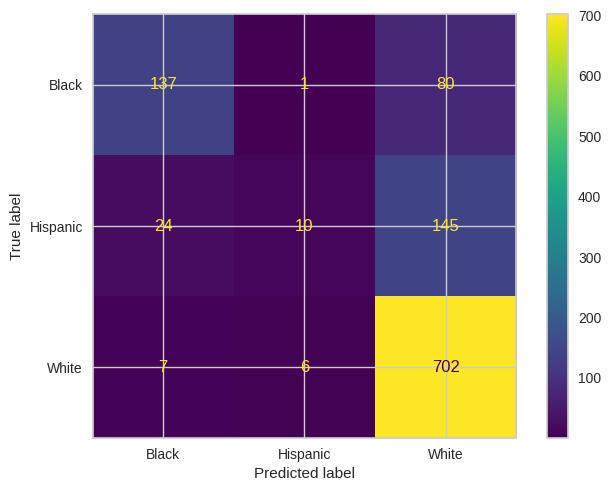

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_pipe, X_test, y_test);

### RF Model GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

operations_rf = [("OneHotEncoder", column_trans),
                  ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

rf_pipe = Pipeline(steps=operations_rf)

param_grid = {'RF_model__n_estimators':[100, 200, 400],
              'RF_model__max_depth':[2,3,4],
              'RF_model__min_samples_split':[18, 20],
              'RF_model__max_features': ['auto', None, 15]
             }

cv = StratifiedKFold(n_splits = 5) # Available in unbalanced datasets

micro_f1 = make_scorer(f1_score, average='micro', labels=["Hispanic"])

rf_model_grid = GridSearchCV(estimator=rf_pipe,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = micro_f1,
                          n_jobs = -1,
                          return_train_score=True)


In [ ]:
rf_model_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingP...
      dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': ['auto', None, 15],
                         'RF_model__min_samples_split': [18, 20],
                         'RF_model__n_estimators': [100, 200, 400]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=micro, labels=['Hispanic']))

In [ ]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[170  17  31]
 [ 30  85  64]
 [ 50 179 486]]
              precision    recall  f1-score   support

       Black       0.68      0.78      0.73       218
    Hispanic       0.30      0.47      0.37       179
       White       0.84      0.68      0.75       715

    accuracy                           0.67      1112
   macro avg       0.61      0.64      0.62      1112
weighted avg       0.72      0.67      0.68      1112


Train_Set
[[ 726   54   94]
 [ 139  368  207]
 [ 176  660 2024]]
              precision    recall  f1-score   support

       Black       0.70      0.83      0.76       874
    Hispanic       0.34      0.52      0.41       714
       White       0.87      0.71      0.78      2860

    accuracy                           0.70      4448
   macro avg       0.64      0.68      0.65      4448
weighted avg       0.75      0.70      0.72      4448



In [ ]:
rf_model_grid.best_score_

0.35629341671025555

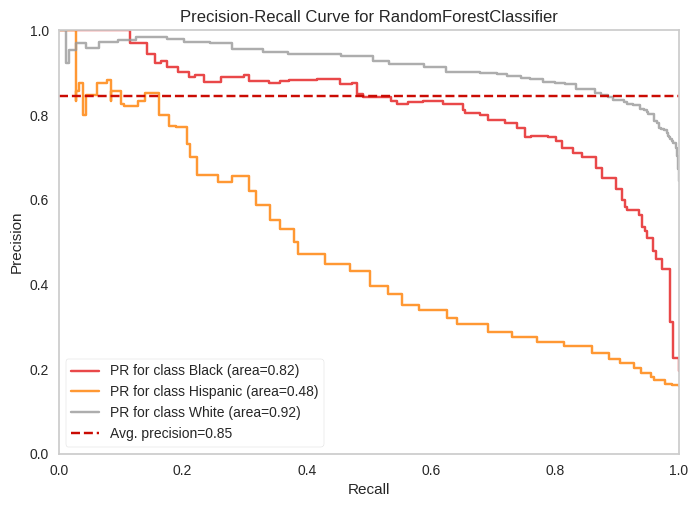

In [ ]:
operations_rf = [("OneHotEncoder", column_trans),
                  ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ['Black', 'Hispanic', 'White'],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
y_pred = rf_model_grid.predict(X_test)

rf_AP = viz.score_['Hispanic']
rf_f1 = f1_score(y_test, y_pred, average='micro', labels=['Hispanic'])
rf_recall = recall_score(y_test, y_pred, average=None, labels=['Hispanic'])

## XGBoost Model

### Vanilla XGBoost Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

xgb_pipe = Pipeline(steps=operations_xgb)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


xgb_pipe.fit(X_train, y_train_encoded)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:

y_test_encoded = label_encoder.transform(y_test)

eval_metric(xgb_pipe, X_train, y_train_encoded, X_test, y_test_encoded)

Test_Set
[[177  13  28]
 [ 18  81  80]
 [  8  18 689]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       218
           1       0.72      0.45      0.56       179
           2       0.86      0.96      0.91       715

    accuracy                           0.85      1112
   macro avg       0.82      0.74      0.77      1112
weighted avg       0.84      0.85      0.84      1112


Train_Set
[[ 874    0    0]
 [   0  714    0]
 [   0    0 2860]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       714
           2       1.00      1.00      1.00      2860

    accuracy                           1.00      4448
   macro avg       1.00      1.00      1.00      4448
weighted avg       1.00      1.00      1.00      4448



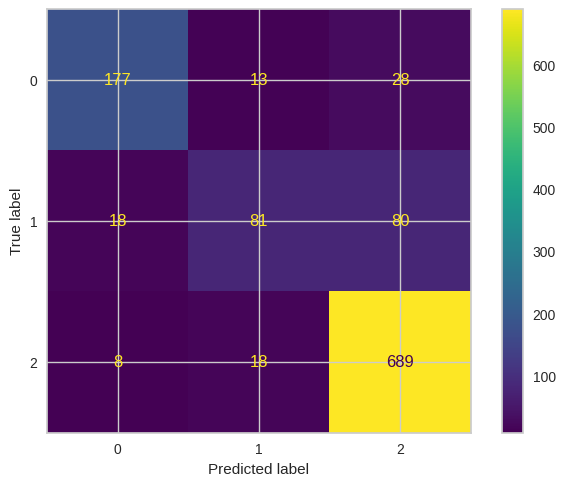

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb_pipe, X_test, y_test_encoded);

### XGB Model GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

operations_xgb = [("OneHotEncoder", column_trans),
                 ("XGB_model", XGBClassifier(random_state=101))]

xgb_pipe = Pipeline(steps=operations_xgb)

param_grid = {"XGB_model__n_estimators":[10, 20, 40],
              'XGB_model__max_depth':[2,3,4],
              "XGB_model__learning_rate": [0.03, 0.05, 0.1],
              "XGB_model__subsample":[0.5, 0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

cv = StratifiedKFold(n_splits = 5) # Available in unbalanced datasets

micro_f1 = make_scorer(f1_score, average='micro', labels=["Hispanic"])

xgb_model_grid = GridSearchCV(estimator=xgb_pipe,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = micro_f1,
                          n_jobs = -1,
                          return_train_score=True)


In [ ]:
xgb_model_grid.fit(X_train, y_train_encoded)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingP...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05, 0.1],
                         'XGB_model__max_depth': [2, 3, 4],
                         'XGB_model__n_estimators': [10, 20, 40],
                         'XGB_model__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=micro, labels=['Hispanic']))

In [ ]:
eval_metric(xgb_model_grid, X_train, y_train_encoded, X_test, y_test_encoded)

Test_Set
[[ 81   0 137]
 [ 17  11 151]
 [ 16   0 699]]
              precision    recall  f1-score   support

           0       0.71      0.37      0.49       218
           1       1.00      0.06      0.12       179
           2       0.71      0.98      0.82       715

    accuracy                           0.71      1112
   macro avg       0.81      0.47      0.48      1112
weighted avg       0.76      0.71      0.64      1112


Train_Set
[[ 380    1  493]
 [  82   76  556]
 [  38    1 2821]]
              precision    recall  f1-score   support

           0       0.76      0.43      0.55       874
           1       0.97      0.11      0.19       714
           2       0.73      0.99      0.84      2860

    accuracy                           0.74      4448
   macro avg       0.82      0.51      0.53      4448
weighted avg       0.77      0.74      0.68      4448



In [ ]:
xgb_model_grid.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.03,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 10,
 'XGB_model__subsample': 0.5}

In [ ]:
xgb_model_grid.best_score_

0.0

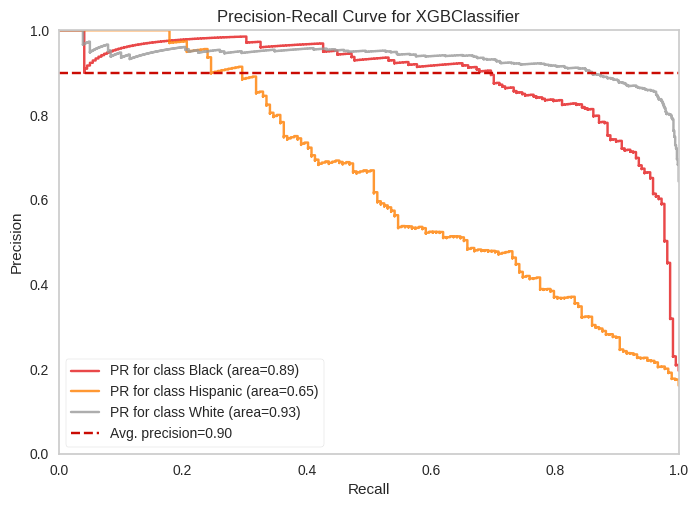

In [ ]:
operations_xgb = [("OneHotEncoder", column_trans),
                 ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ['Black', 'Hispanic', 'White'],
    cmap="Set1"
)
viz.fit(X_train, y_train_encoded)
viz.score(X_test, y_test_encoded)
viz.show();

In [ ]:
y_pred = xgb_model_grid.predict(X_test)

xgb_AP = viz.score_['Hispanic']
xgb_f1 = f1_score(y_test_encoded, y_pred, average='micro', labels=['Hispanic'])
xgb_recall = recall_score(y_test_encoded, y_pred, average=None, labels=['Hispanic'])

## Comparing Models

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})    # Dengesiz datasetlerinde modelin genel performansi.

def labels(ax):   # Sayilari yazdirmak icin.
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")       # average precision score
labels(ax)
plt.show()

# Final Model

In [ ]:
cat = X_train.select_dtypes(include='object').columns

column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                       remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(C=0.9,penalty= 'l1', solver= 'liblinear',class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

final_model = Pipeline(steps=operations_final)

In [ ]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('log',
                 LogisticRegression(C=0.9, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='liblinear'))])

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

In [ ]:
# Increase the minority class using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='auto', random_state=101)

# Reduce the majority class using RandomUnderSampler
under = RandomUnderSampler(sampling_strategy='auto', random_state=101)

# Using the SMOTEENN (SMOTE + Edited Nearest Neighbors) method
smote_enn = SMOTEENN(random_state=101)

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
operations = [("OneHotEncoder", column_trans_final), ('o', smote), ('u', under),
              ('enn', smote_enn),
              ("log", LogisticRegression( C=0.9, penalty= 'l1', solver= 'liblinear', class_weight='balanced', max_iter=10000,
                                                                          random_state=101))]

smote_pipeline = imbpipeline(steps=operations)

In [ ]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('o', SMOTE(random_state=101)),
                ('u', RandomUnderSampler(random_state=101)),
                ('enn', SMOTEENN(random_state=101)),
                ('log',
                 LogisticRegression(C=0.9, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='liblinear'))])

In [ ]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[195  22   1]
 [ 13 147  19]
 [ 42 187 486]]
              precision    recall  f1-score   support

       Black       0.78      0.89      0.83       218
    Hispanic       0.41      0.82      0.55       179
       White       0.96      0.68      0.80       715

    accuracy                           0.74      1112
   macro avg       0.72      0.80      0.73      1112
weighted avg       0.84      0.74      0.76      1112


Train_Set
[[ 815   47   12]
 [  54  622   38]
 [ 144  715 2001]]
              precision    recall  f1-score   support

       Black       0.80      0.93      0.86       874
    Hispanic       0.45      0.87      0.59       714
       White       0.98      0.70      0.81      2860

    accuracy                           0.77      4448
   macro avg       0.74      0.83      0.76      4448
weighted avg       0.86      0.77      0.79      4448



The scores we obtain when this code runs are as follows:

**data.drop(['Installation', 'Component', 'Branch', 'PrimaryMOS'], axis=1, inplace=True)**

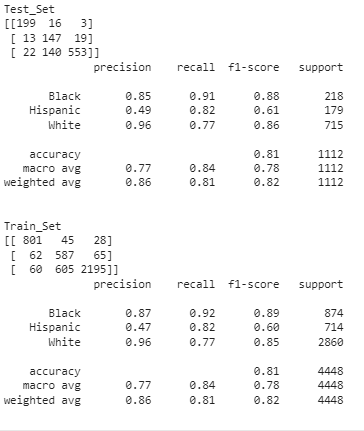